In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(42)

In [2]:
# set parameters
Npointings = 60
fov = 0.73 # deg
xlim = (0., 2.) # deg
ylim = (0., 2.) # deg
xmin = xlim[0] + 0.5 * fov # deg
xmax = xlim[1] - 0.5 * fov # deg
ymin = ylim[0] + 0.5 * fov # deg
ymax = ylim[1] - 0.5 * fov # deg

In [3]:
# make a fake set of stars (trust me, it's a good idea)
Nstars = 1024
star_xs = xlim[0] + (xlim[1] - xlim[0]) * np.random.uniform(size=Nstars)
star_ys = ylim[0] + (ylim[1] - ylim[0]) * np.random.uniform(size=Nstars)

In [4]:
# A: simplest plan: 60 pointings; total random
A_xs = xmin + (xmax - xmin) * np.random.uniform(size=60)
A_ys = ymin + (ymax - ymin) * np.random.uniform(size=60)

In [5]:
xp = fov * np.array([-0.5, 0.5, 0.5, -0.5, -0.5])
yp = fov * np.array([-0.5, -0.5, 0.5, 0.5, -0.5])
def plot_one_field(x, y):
    plt.plot(x + xp, y + yp, "r-", alpha=0.75)

In [6]:
def plot_one_survey(name, xs, ys):
    plt.figure(figsize=(5,5))
    plt.scatter(star_xs, star_ys, color="k", marker=".", alpha=0.1)
    for x, y in zip(xs, ys):
        plot_one_field(x, y)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.title(name + " field locations")

In [7]:
def plot_star_hits(name, xs, ys):
    plt.figure(figsize=(5,5))
    dxs = (star_xs[:, None] - xs[None, :]).flatten()
    dys = (star_ys[:, None] - ys[None, :]).flatten()
    plt.scatter(dxs, dys, color="k", marker=".", alpha=0.25)
    plt.xlim(-0.5 * fov, 0.5 * fov)
    plt.ylim(-0.5 * fov, 0.5 * fov)
    plt.title(name + " star hits")

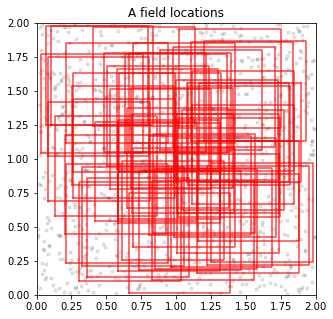

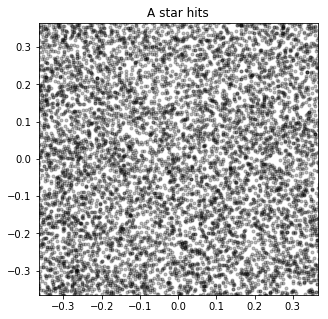

In [8]:
plot_one_survey("A", A_xs, A_ys)
plot_star_hits("A", A_xs, A_ys)

In [9]:
# B: More interesting plan: 58 pointings; plaid pattern (good for self-cal)
nx, ny = 5, 4
B_xs = np.outer(np.linspace(xmin, xmax, nx), np.ones(ny)).flatten()
B_ys = np.outer(np.linspace(ymin, ymax, ny), np.ones(nx)).T.flatten()
nx, ny = 4, 5
B_xs = np.append(B_xs, np.outer(np.linspace(xmin, xmax, nx), np.ones(ny)).flatten())
B_ys = np.append(B_ys, np.outer(np.linspace(ymin, ymax, ny), np.ones(nx)).T.flatten())
nx, ny = 6, 3
B_xs = np.append(B_xs, np.outer(np.linspace(xmin, xmax, nx), np.ones(ny)).flatten())
B_ys = np.append(B_ys, np.outer(np.linspace(ymin, ymax, ny), np.ones(nx)).T.flatten())

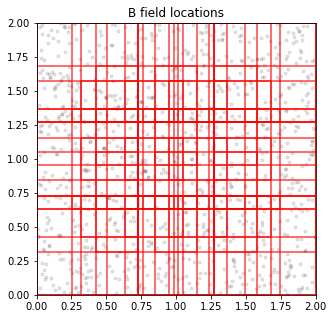

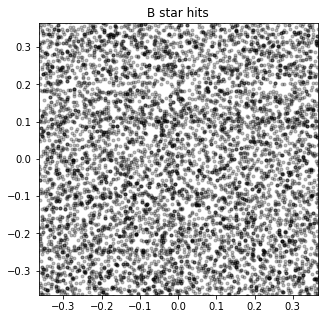

In [10]:
plot_one_survey("B", B_xs, B_ys)
plot_star_hits("B", B_xs, B_ys)

In [11]:
# C: ultra-uniform plan: 64 pointings, far more uniform than Poisson
nx, ny = 8, 8
C_xs = np.outer(np.linspace(xmin, xmax, nx), np.ones(ny)).flatten()
C_ys = np.outer(np.linspace(ymin, ymax, ny), np.ones(nx)).T.flatten()
C_xs += ((xmin - xmax) / nx) * (0.5 - np.random.uniform(size=C_xs.shape))
C_ys += ((ymin - ymax) / ny) * (0.5 - np.random.uniform(size=C_ys.shape))
C_xs = np.clip(C_xs, xmin, xmax)
C_ys = np.clip(C_ys, ymin, ymax)

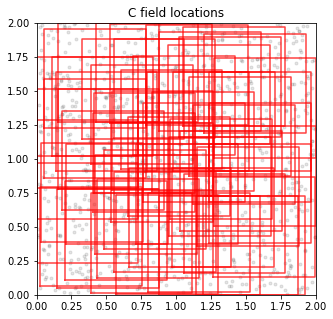

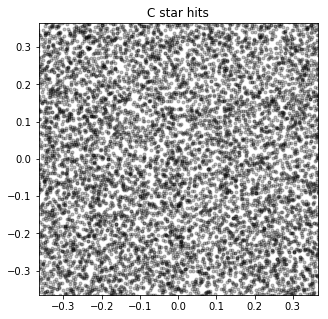

In [12]:
plot_one_survey("C", C_xs, C_ys)
plot_star_hits("C", C_xs, C_ys)